# **Global Earthquake-Tsunami Risk Assessment Dataset**

**members**

เบญญาดา บุบผะศิริ 6642066526

ภัคจิรา วิชญวาณิช 6642091126

นลิน เงินสด 6642057926

นิรุชา ด้วงมาก 6642061326

อภิสรา เชยสุวรรณ 6642113326

ณภาดา โอภาสวรรัตน์ 6642034426

**Feature**

---



*   magnitude ขนาดของแผ่นดินไหวตามมาตราริกเตอร์ ยิ่งสูงยิ่งมีโอกาสเกิดสึนามิ
*   cdi ค่าความรุนแรงที่ประชาชนรู้สึกได้ (Community Decimal Intensity) ใช้วัดผลกระทบต่อผู้คน
*   mmi ค่าความรุนแรงเชิงโครงสร้าง (Modified Mercalli Intensity) บ่งบอกระดับความเสียหายของสิ่งปลูกสร้าง
*   sig คะแนนความสำคัญของเหตุการณ์ โดยรวมถึงขนาดและผลกระทบของแผ่นดินไหว
*   nst จำนวนสถานีตรวจวัดแผ่นดินไหวที่บันทึกข้อมูล ใช้ประเมินคุณภาพของข้อมูล
*   dmin ระยะทางถึงสถานีตรวจวัดที่ใกล้ที่สุด (องศา) ใช้บ่งบอกความแม่นยำของตำแหน่ง
*   gap ช่องว่างเชิงมุมระหว่างสถานีตรวจวัด (องศา) ค่าน้อยหมายถึงข้อมูลตำแหน่งแม่นยำกว่า
*   depth ความลึกของจุดศูนย์กลางแผ่นดินไหว (กิโลเมตร) ยิ่งตื้นยิ่งมีโอกาสเกิดสึนามิสูง
*   latitude ลองจิจูดของจุดศูนย์กลางแผ่นดินไหว ใช้ระบุตำแหน่งทางภูมิศาสตร์
*   longitude ลองจิจูดของจุดศูนย์กลางแผ่นดินไหว ใช้ระบุตำแหน่งทางภูมิศาสตร์
*   Year ปีที่เกิดเหตุการณ์ ใช้วิเคราะห์แนวโน้มตามเวลา
*   Month เดือนที่เกิดเหตุการณ์ ใช้วิเคราะห์รูปแบบตามฤดูกาล

**Target**

---


*   tsunami แสดงว่าเหตุการณ์นั้นก่อให้เกิดสึนามิ (1) หรือไม่ (0)

Link : [Data set](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)

**Question**:
1.   เราสามารถทำนายได้หรือไม่ว่าแผ่นดินไหวเหตุการณ์หนึ่งจะก่อให้เกิดสึนามิหรือไม่ โดยใช้ข้อมูลทางธรณีวิทยา ( magnitude, depth, latitude, longitude, sig, mmi, cdi, nst, dmin, gap )
2.   จากข้อมูลเชิงธรณีวิทยา (depth, latitude, longitude, sig, mmi, cdi, nst, dmin, gap) เราสามารถ ทำนายค่าขนาดแผ่นดินไหว (Richter/Mw) แบบต่อเนื่อง ได้แม่นยำเพียงใด?

Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving earthquake_data_tsunami.csv to earthquake_data_tsunami.csv


In [ ]:
df = pd.read_csv("earthquake_data_tsunami.csv")
df.head(10)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.5960,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.7380,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.3460,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.1290,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.2780,2022,11,1
5,7.0,4,3,755,142,4.578,26.0,660.000,-26.0442,178.3810,2022,11,1
6,6.8,1,3,711,136,4.678,22.0,630.379,-25.9678,178.3630,2022,11,1
7,6.7,7,6,797,145,1.151,37.0,20.000,7.6712,-82.3396,2022,10,1
8,6.8,8,7,1179,175,2.137,92.0,20.000,18.3300,-102.9130,2022,9,1
9,7.6,9,8,1799,271,1.153,69.0,26.943,18.3667,-103.2520,2022,9,1


#Data proprocessing


###Data inspection


In [ ]:
df.shape

(782, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [ ]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


###Missing value

In [ ]:
df.isnull().sum()

,0
magnitude,0
cdi,0
mmi,0
sig,0
nst,0
dmin,0
gap,0
depth,0
latitude,0
longitude,0


 ไม่พบ missing data values

###**Target : tsunami**

In [ ]:
y = df["tsunami"] #สร้างตัวแปร y ที่เก็บเฉพาะคอลัมน์ "tsunami" จาก DataFrame

In [ ]:
y.value_counts()/y.shape[0] #นับจำนวนข้อมูลแต่ละค่าในคอลัมน์ tsunami (ค่าที่เป็น 0 หมายถึง “ไม่มีสึนามิ”  ค่าที่เป็น 1 หมายถึง “มีสึนามิ”) หารด้วยหารด้วยจำนวนข้อมูลทั้งหมดเพื่อดูสัดส่วน
#data ค่อนข้าง balance

,count
tsunami,
0,0.611253
1,0.388747


Text(0.5, 1.0, 'Tsunami Occurrence\n (Total: 782)')

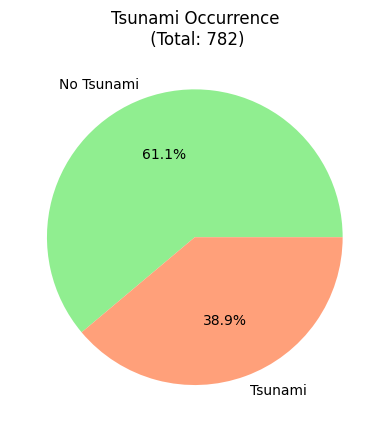

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(df['tsunami'].value_counts(), labels=['No Tsunami', 'Tsunami'], autopct='%1.1f%%', colors=[ 'lightgreen', 'lightsalmon'])
plt.title('Tsunami Occurrence\n (Total: 782)')

- ประมาณ 61.1% ของข้อมูล = ไม่มีสึนามิ (0)

- ประมาณ 38.9% ของข้อมูล = มีสึนามิ (1)

ข้อมูลค่อนข้างสมดุล

# EDA

###Features


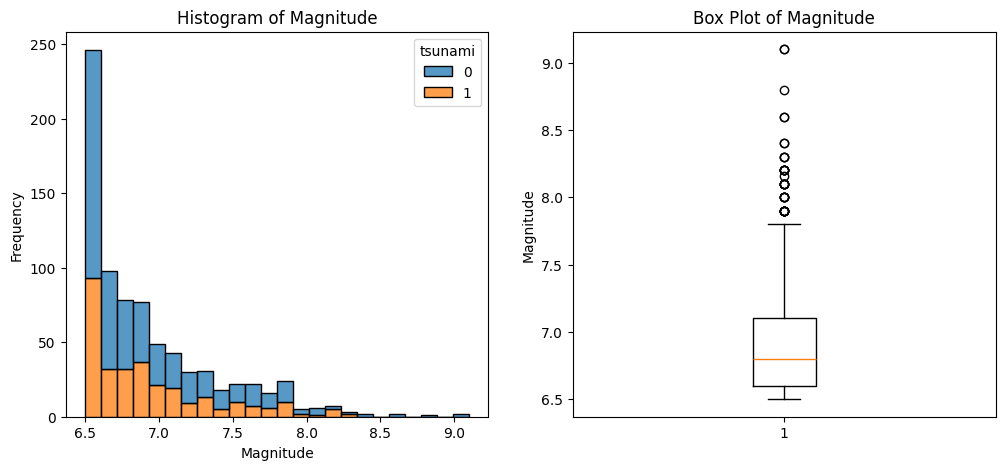

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
magnitude_hist = sns.histplot(data=df, x='magnitude', hue='tsunami', multiple='stack', ax=axes[0])
magnitude_hist.set_title("Histogram of Magnitude")
magnitude_hist.set_xlabel("Magnitude")
magnitude_hist.set_ylabel("Frequency")

axes[1].boxplot(df['magnitude'])
plt.title('Box Plot of Magnitude')
plt.ylabel('Magnitude')
plt.show()

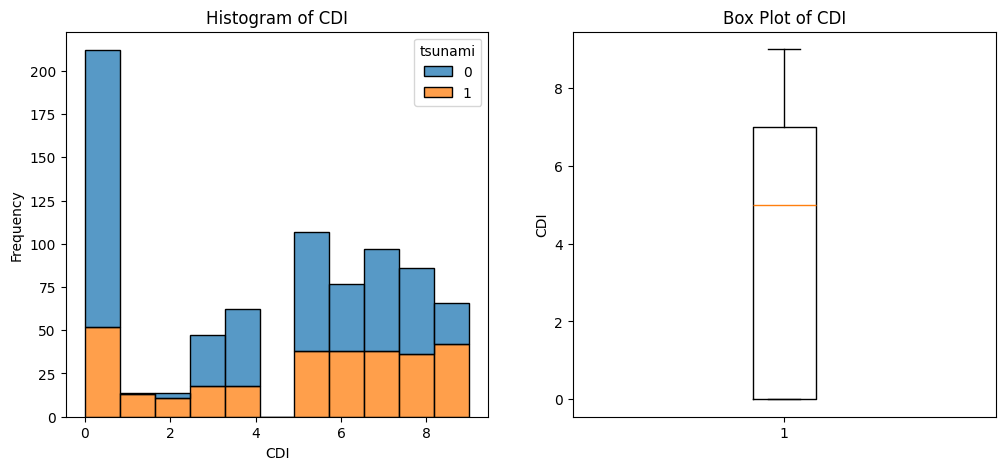

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
cdi_hist = sns.histplot(data=df, x='cdi', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
cdi_hist.set_title("Histogram of CDI")
cdi_hist.set_xlabel("CDI")
cdi_hist.set_ylabel("Frequency")

axes[1].boxplot(df['cdi'])
plt.title('Box Plot of CDI')
plt.ylabel('CDI')
plt.show()

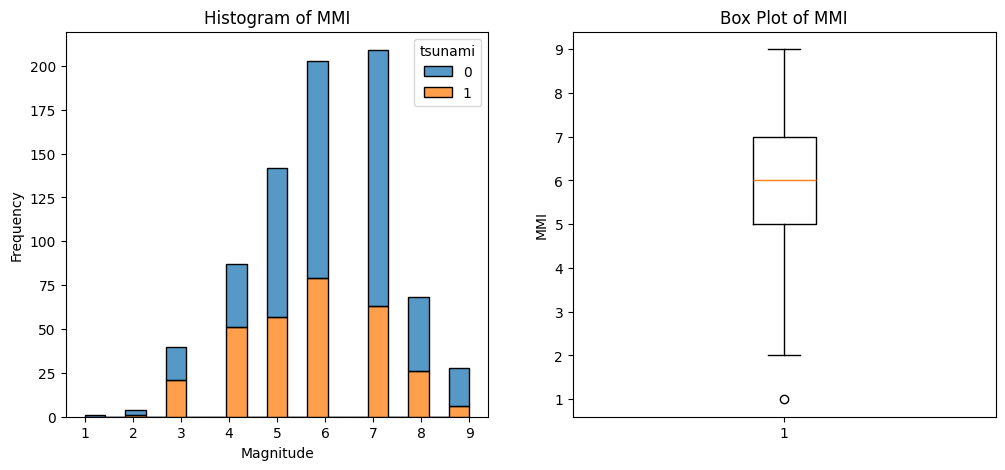

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
mmi_hist = sns.histplot(data=df, x='mmi', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
mmi_hist.set_title("Histogram of MMI")
mmi_hist.set_xlabel("Magnitude")
mmi_hist.set_ylabel("Frequency")

axes[1].boxplot(df['mmi'])
plt.title('Box Plot of MMI')
plt.ylabel('MMI')
plt.show()

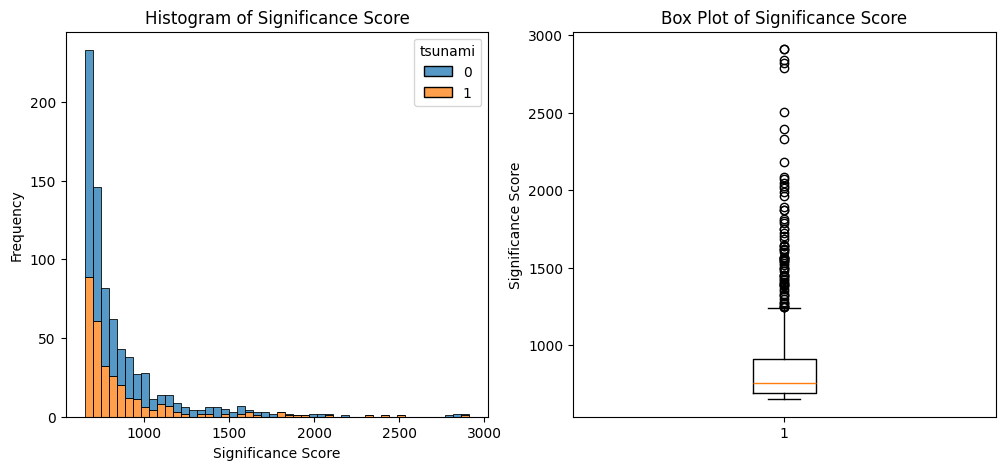

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sig_hist = sns.histplot(data=df, x='sig', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
sig_hist.set_title("Histogram of Significance Score")
sig_hist.set_xlabel("Significance Score")
sig_hist.set_ylabel("Frequency")

axes[1].boxplot(df['sig'])
plt.title("Box Plot of Significance Score")
plt.ylabel("Significance Score")
plt.show()

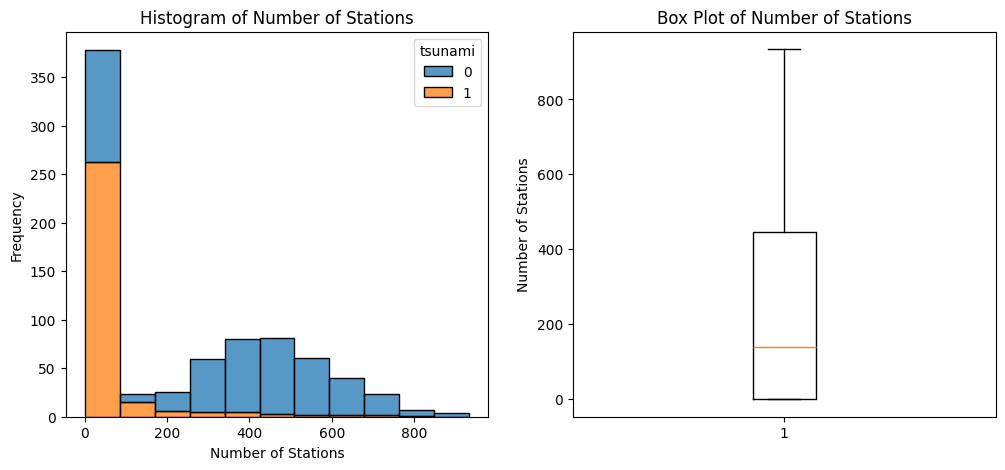

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
nst_hist = sns.histplot(data=df, x='nst', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
nst_hist.set_title("Histogram of Number of Stations")
nst_hist.set_xlabel("Number of Stations")
nst_hist.set_ylabel("Frequency")

axes[1].boxplot(df['nst'])
plt.title("Box Plot of Number of Stations")
plt.ylabel("Number of Stations")
plt.show()

Text(0, 0.5, 'Distance to Closest Station')

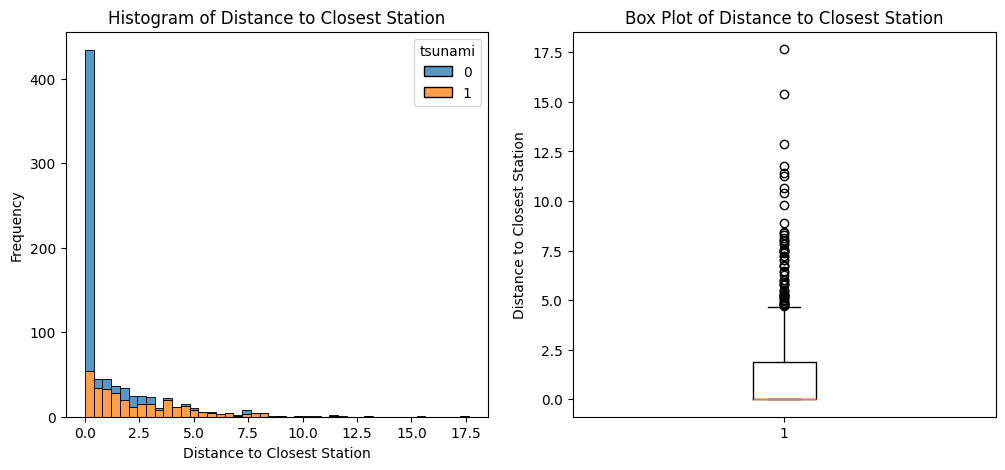

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
dmin_hist = sns.histplot(data=df, x='dmin', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
dmin_hist.set_title("Histogram of Distance to Closest Station")
dmin_hist.set_xlabel("Distance to Closest Station")
dmin_hist.set_ylabel("Frequency")

axes[1].boxplot(df['dmin'])
plt.title("Box Plot of Distance to Closest Station")
plt.ylabel("Distance to Closest Station")

Text(0, 0.5, 'Azimuthal Gap between Stations')

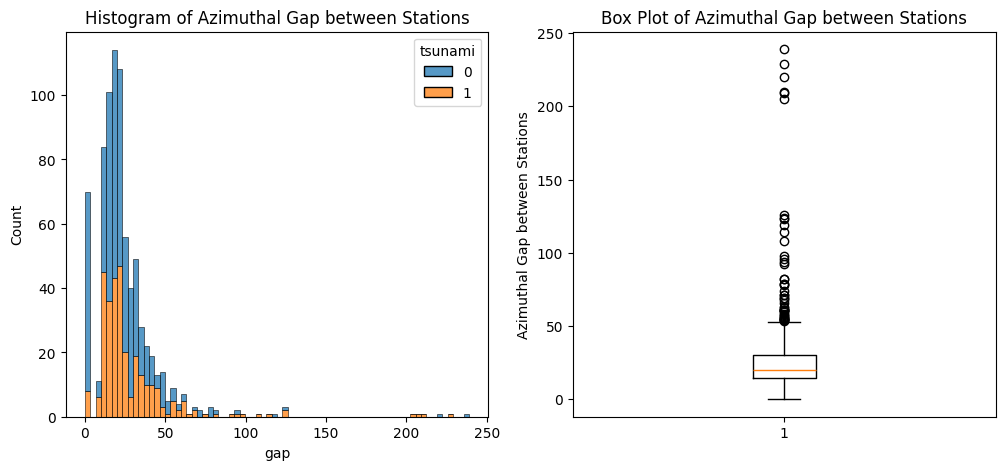

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
gap_hist = sns.histplot(data = df, x = 'gap', hue='tsunami', multiple='stack', color = 'lightgreen', ax=axes[0])
gap_hist.set_title("Histogram of Azimuthal Gap between Stations")

axes[1].boxplot(df['gap'])
plt.title("Box Plot of Azimuthal Gap between Stations")
plt.ylabel("Azimuthal Gap between Stations")

Text(0, 0.5, 'Focal Depth')

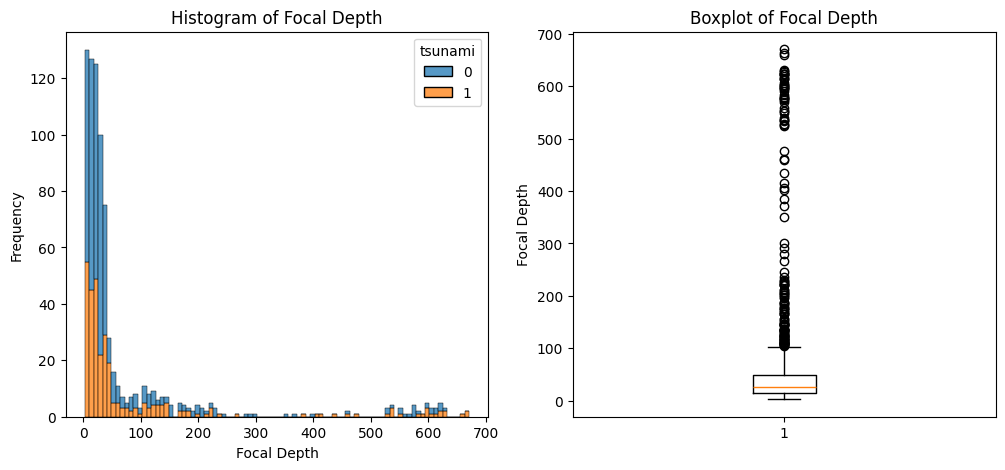

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
depth_hist = sns.histplot(data=df, x='depth', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
depth_hist.set_title("Histogram of Focal Depth")
depth_hist.set_xlabel("Focal Depth")
depth_hist.set_ylabel("Frequency")

axes[1].boxplot(df['depth'])
plt.title("Boxplot of Focal Depth")
plt.ylabel("Focal Depth")

Text(0, 0.5, 'Latitude')

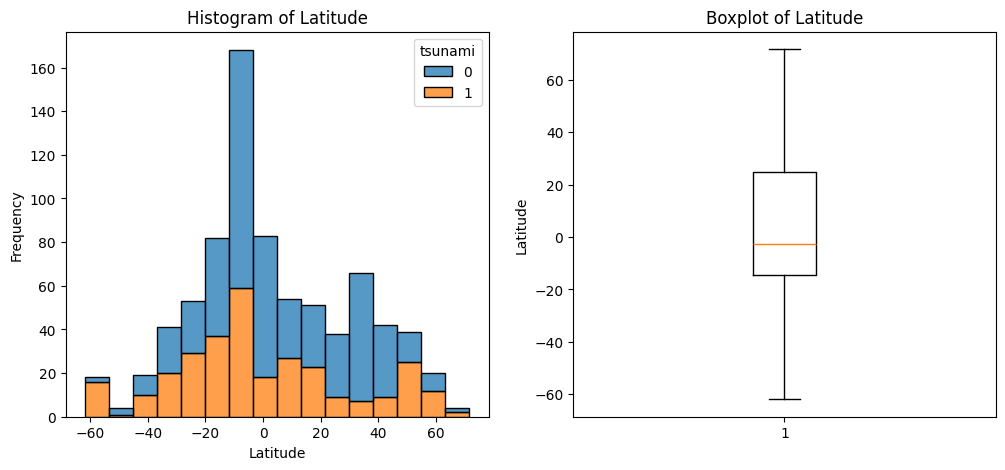

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
latitude_hist = sns.histplot(data=df, x='latitude', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
latitude_hist.set_title("Histogram of Latitude")
latitude_hist.set_xlabel("Latitude")
latitude_hist.set_ylabel("Frequency")

axes[1].boxplot(df['latitude'])
plt.title("Boxplot of Latitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Longitude')

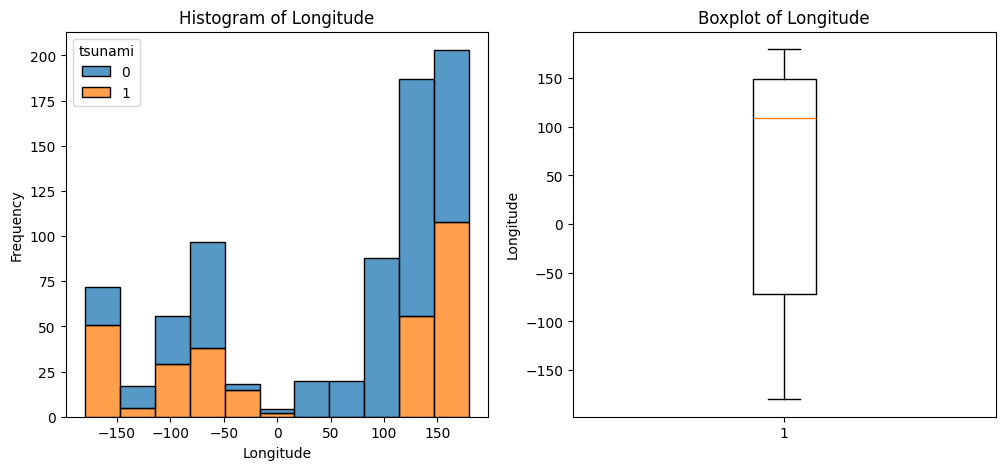

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
longtitude_hist = sns.histplot(data=df, x='longitude', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
longtitude_hist.set_title("Histogram of Longitude")
longtitude_hist.set_xlabel("Longitude")
longtitude_hist.set_ylabel("Frequency")

axes[1].boxplot(df['longitude'])
plt.title("Boxplot of Longitude")
plt.ylabel("Longitude")

Text(0, 0.5, 'Year')

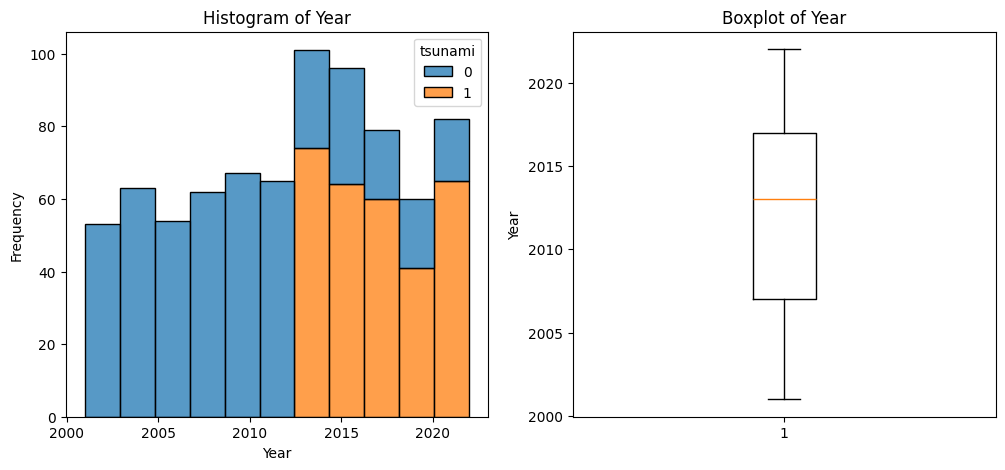

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
year_hist = sns.histplot(data=df, x='Year', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
year_hist.set_title("Histogram of Year")
year_hist.set_xlabel("Year")
year_hist.set_ylabel("Frequency")

axes[1].boxplot(df['Year'])
plt.title("Boxplot of Year")
plt.ylabel("Year")

Text(0, 0.5, 'Month')

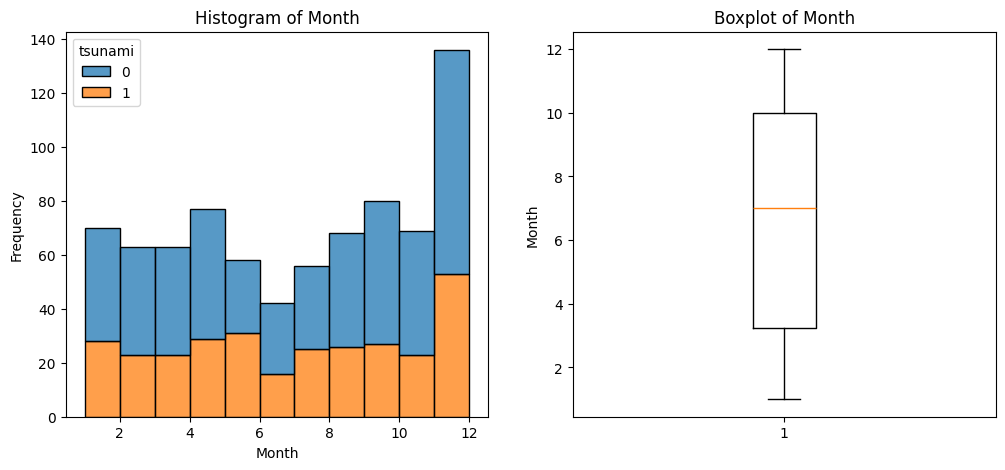

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
month_hist = sns.histplot(data=df, x='Month', hue='tsunami', multiple='stack', color='lightgreen', ax=axes[0])
month_hist.set_title("Histogram of Month")
month_hist.set_xlabel("Month")
month_hist.set_ylabel("Frequency")

axes[1].boxplot(df['Month'])
plt.title("Boxplot of Month")
plt.ylabel("Month")

###Stationary

ADF Statistic: -8.61968030937294
p-value: 6.15327877200854e-14
ข้อมูล stationary (ไม่มีแนวโน้มชัดเจน)


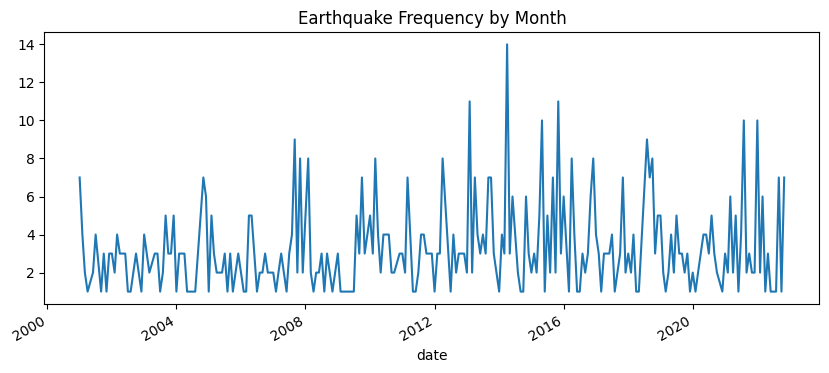

In [ ]:
#ไม่นำ yearและ month มาคิดเนื่องจาก stationary ซึ่งหมายถึง
#ค่าเฉลี่ยคงที่ตลอดเวลา varianceคงที่ตลอดเวลาและ autocovariance ไม่เปลี่ยนตามเวลา > ไม่มี trend นำไปวิเคราะห์ไม่ได้
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# สร้าง time series จากปี-เดือน
df['date'] = pd.to_datetime(df[['Year','Month']].assign(DAY=1))
# นับจำนวนเหตุการณ์ต่อเดือน monthly
monthly_counts = df.groupby('date').size()

# ดูแนวโน้ม
monthly_counts.plot(figsize=(10,4), title="Earthquake Frequency by Month")

# ทดสอบ stationarity (ADF test)
result = adfuller(monthly_counts.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("ข้อมูล stationary (ไม่มีแนวโน้มชัดเจน)")
else:
    print("ข้อมูลไม่ stationary (มีแนวโน้มหรือฤดูกาล)")

###Outliers

In [ ]:
# outlier เยอะ -> rare but valid จึงเลือกใช้โมเดล Random forest, XGBoost ซึ่งโมเดลนี้ทนต่อ outlier ได้
num_cols = [
    "magnitude","cdi","mmi","sig","nst","dmin","gap","depth",
    "latitude","longitude"]

def iqr_bounds(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k*iqr
    high = q3 + k*iqr
    return low, high

def detect_outliers_iqr(df, cols, k=1.5):
    out_count = {}
    masks = {}
    for c in cols:
        low, high = iqr_bounds(df[c].dropna(), k=k)
        m = (df[c] < low) | (df[c] > high)
        out_count[c] = int(m.sum())
        masks[c] = m
    return pd.Series(out_count).sort_values(ascending=False), masks

out_counts, out_masks = detect_outliers_iqr(df, num_cols, k=1.5)
print(out_counts)

depth        139
sig           73
dmin          61
gap           48
magnitude     37
mmi            1
cdi            0
nst            0
latitude       0
longitude      0
dtype: int64


ไม่ควรเอา outliers แต่ละตัวออกเพราะ
*   dept outliers เช่น แผ่นดินไหวตื้นมาก (<10 km) หรือ ลึกมาก (>600 km) เกิดขึ้นได้จริงและมีผลต่อระดับการสั่นสะเทือนและโอกาสเกิดสึนามิ
*   sig สูงบ่งชี้เหตุการณ์รุนแรงหรือมีความเสียหายมาก ขณะที่ค่าต่ำอาจหมายถึงแผ่นดินไหวเล็กที่ห่างไกล

*   dmin ค่าน้อยแปลว่าใกล้สถานีตรวจจับ (ข้อมูลละเอียด) ส่วนค่ามากอาจเกิดในพื้นที่ห่างไกลหรือในมหาสมุทร
*   gap มากหมายถึงเครือข่ายตรวจจับกระจายตัวไม่ดี ข้อมูลอาจไม่แม่น แต่ยังเป็นข้อมูลจริงที่ต้องสะท้อนในโมเดล

*   magnitude ค่าที่สูง (เช่น >8) เป็นเหตุการณ์ใหญ่และหายาก แต่สำคัญที่สุดในการทำนายสึนามิ








Text(0.5, 0, 'Year')

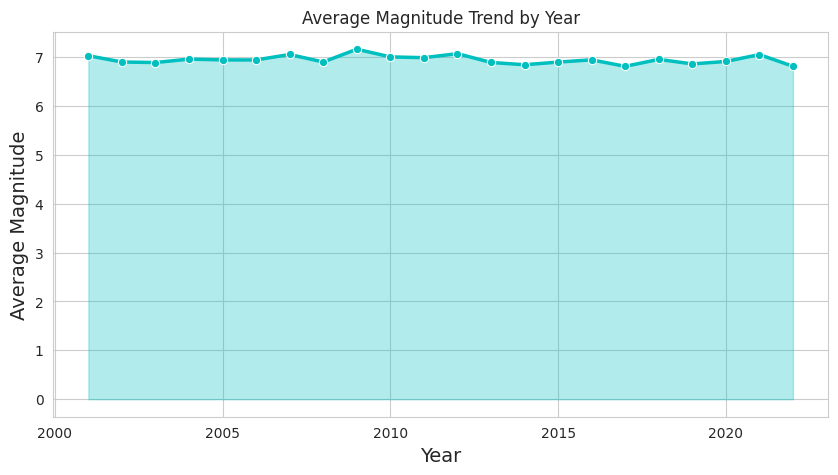

In [ ]:
avg_magnitude_by_year = df.groupby('Year')['magnitude'].mean().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=avg_magnitude_by_year, x="Year", y="magnitude", marker='o', linewidth=2.5, color='c')
plt.fill_between(x=avg_magnitude_by_year['Year'], y1=avg_magnitude_by_year['magnitude'], y2=0, color='c', alpha=0.3)
plt.title('Average Magnitude Trend by Year')
plt.ylabel('Average Magnitude', fontsize=14)
plt.xlabel('Year', fontsize=14)

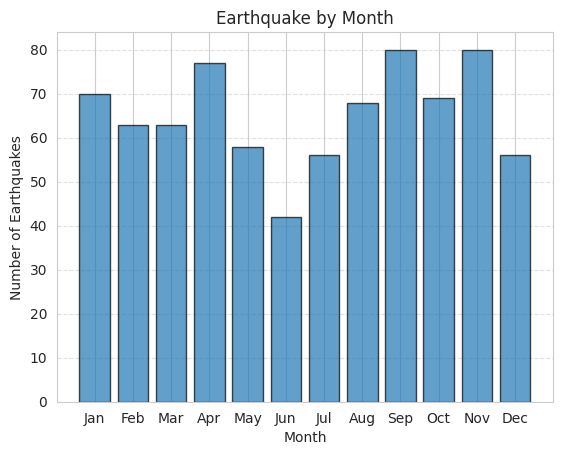

In [ ]:
earthquake_by_month = df.groupby('Month')['tsunami'].count().reset_index()
earthquake_by_month['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(earthquake_by_month['Month'], earthquake_by_month['tsunami'], edgecolor='black', alpha=0.7)
plt.title("Earthquake by Month")
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

###Correlation

In [ ]:
df_notime=df.drop(columns=['Year','Month']) #ลบคอลัมน์ Year และ Month เนื่องจากเป็นข้อมูลเวลา ไม่ใช่ตัวแปรเชิงปริมาณ
df_notime.corr() #คำนวณ ค่า correlation ระหว่างทุกคู่ของตัวแปรเชิงตัวเลขใน dataset

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,tsunami,date
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.004726,-0.057653
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.160266,0.423462
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.147363,-0.214546
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,-0.015500,0.123038
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.600231,-0.689220
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.400752,0.531214
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.116360,0.192796
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.056814,0.181539
latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.113209,-0.092471
longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.136778,-0.186602


ค่า correlation อยู่ในช่วง -1 ถึง 1:

- ค่าใกล้ 1 → สัมพันธ์ทางบวกแรง (เพิ่มพร้อมกัน)

- ค่าใกล้ -1 → สัมพันธ์ทางลบแรง (เพิ่มอีกตัวลดอีกตัว)

- ค่าใกล้ 0 → สัมพันธ์กันน้อยหรือไม่มีความสัมพันธ์เชิงเส้น

พบว่าไม่มีตัวแปรใดมีความสัมพันธ์สูงกับ tsunami และ magnitude

<Axes: >

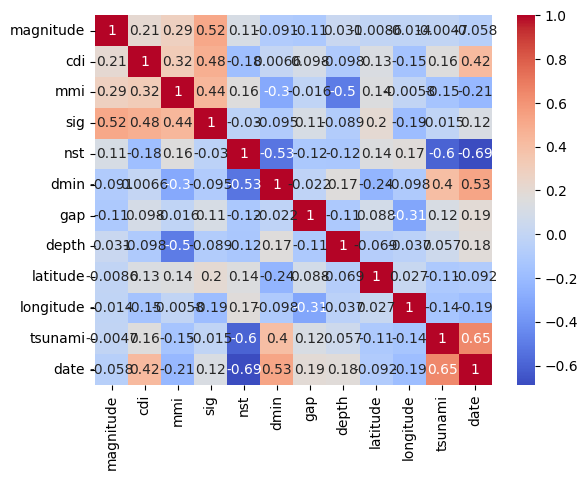

In [ ]:
import seaborn as sns
sns.heatmap(df_notime.corr(), annot=True, cmap='coolwarm')

###VIF

Question 1 เราสามารถทำนายได้หรือไม่ว่าแผ่นดินไหวเหตุการณ์หนึ่งจะก่อให้เกิดสึนามิหรือไม่ โดยใช้ข้อมูลทางธรณี ( magnitude, depth, latitude, longitude, sig, mmi, cdi, nst, dmin, gap )

In [ ]:
#ตรวจสอบว่าตัวแปรอิสระใดมีความสัมพันธ์เชิงเส้นกันมากเกินไปหรือไม่ (มีปัญหา multicollinearity หรือไม่)
import statsmodels.api as sm #นำเข้าไลบรารี statsmodels (ตั้งชื่อย่อเป็น sm) ซึ่งใช้สำหรับงานสถิติและการสร้างโมเดลเชิงเส้น
from statsmodels.stats.outliers_influence import variance_inflation_factor #นำเข้าฟังก์ชัน variance_inflation_factor() จากโมดูล statsmodels เพื่อใช้คำนวณค่า VIF ของแต่ละตัวแปรในชุด X
import pandas as pd

X = df[['magnitude', 'depth', 'latitude', 'longitude', 'sig', 'mmi', 'cdi', 'nst', 'dmin', 'gap']] #สร้าง DataFrame X ที่ประกอบด้วยเฉพาะคอลัมน์ตัวแปรอิสระ (features) ที่ต้องการตรวจสอบ multicollinearity
X = sm.add_constant(X) # เพิ่มคอลัมน์ค่าคงที่ (inter0) การใส่คอลัมน์นี้ทำให้เมื่อคำนวณ VIF ฟังก์ชันจะรวม intercept ด้วย จึงทำให้เห็นค่า VIF ของ const สูงมาก
vif = pd.DataFrame() #สร้าง DataFrame เปล่า เพื่อเก็บผลลัพธ์ชื่อคอลัมน์และค่า VIF
vif["Variable"] = X.columns #เติมคอลัมน์ Variable ใน DataFrame vif ด้วยรายชื่อตัวแปรทั้งหมดจาก X.columns (รวม const ด้วย)
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #สร้างลูปคำนวณ VIF ให้ทุกคอลัมน์ใน X แล้วเก็บค่าไว้ในตาราง vif
print(vif)

#ค่า VIF question 1 น้อยกว่า 10 ไม่มีปัญหา multicollinearity ที่ชัดเจน

     Variable         VIF
0       const  317.245086
1   magnitude    1.508369
2       depth    1.456581
3    latitude    1.140730
4   longitude    1.181673
5         sig    2.026163
6         mmi    1.922789
7         cdi    1.397216
8         nst    1.525347
9        dmin    1.545674
10        gap    1.201379


Question 2 ถ้าเรารู้พิกัด (latitude, longitude) และขนาดแผ่นดินไหว (magnitude) เราจะสามารถระบุภูมิภาคที่มีความเสี่ยงเกิดสึนามิสูงได้ไหม?

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[['depth', 'latitude', 'longitude', 'sig', 'mmi', 'cdi', 'nst', 'dmin', 'gap']]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

#ค่า VIF question 2 น้อยกว่า 10 ไม่มีปัญหา multicollinearity ที่ชัดเจน

    Variable        VIF
0      const  38.134928
1      depth   1.430988
2   latitude   1.115030
3  longitude   1.179605
4        sig   1.596715
5        mmi   1.900892
6        cdi   1.396827
7        nst   1.500813
8       dmin   1.545487
9        gap   1.181397


#Split training data and test data

###Question 1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

cols1 = ["magnitude","depth","latitude","longitude","sig","mmi","cdi","nst","dmin","gap"] #รายชื่อตัวแปรที่ใช้ในการทำนาย
X_Q1 = df[df.columns.intersection(cols1)] #ตรวจสอบว่าใน dataframe มีคอลัมน์เหล่านี้ครบไหม
Y_Q1 = df['tsunami'] # TARGET
featurename = X_Q1.columns
Y_Q1_value = ["0","1"] # (1 = มีสึนามิ, 0 = ไม่มีสึนามิ)


In [ ]:
X_trainQ1, X_testQ1, Y_trainQ1, Y_testQ1 = train_test_split( X_Q1, Y_Q1, test_size = 0.2, random_state = 1234, stratify = Y_Q1)
##แบ่ง dataset training set และ test set โดยแบ่ง test 20% train 80%
print('training set = {} records, test set= {} records'.format(X_trainQ1.shape[0],X_testQ1.shape[0]))

training set = 625 records, test set= 157 records


In [ ]:
X_testQ1.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude
669,8.1,0,5,1009,331,0.000,59.3,10.00,-49.3120,161.345
327,6.7,5,5,724,0,0.460,11.0,130.00,13.7641,144.429
112,6.6,4,4,673,0,5.086,48.0,10.00,-18.5747,-175.272
324,6.6,2,6,671,0,3.557,13.0,53.19,-5.9873,148.232
238,6.9,2,3,733,0,4.051,9.0,596.40,-19.7819,-178.244


In [ ]:
Y_testQ1.head()

,tsunami
669,0
327,1
112,1
324,1
238,1


In [ ]:
X_trainQ1.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,6.944096,4.320000,5.971200,867.889600,231.992000,1.334176,25.212464,75.784016,3.228467,54.299244
std,0.450609,3.172902,1.451945,310.979314,249.173264,2.259974,24.810671,138.005853,27.035131,117.108659
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.900000,15.000000,-14.252000,-71.637000
50%,6.800000,5.000000,6.000000,755.000000,145.000000,0.000000,20.000000,27.000000,-3.212000,119.802000
75%,7.100000,7.000000,7.000000,912.000000,446.000000,1.822000,29.000000,51.600000,23.094400,150.590000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [ ]:
num_cols = [
    "magnitude","cdi","mmi","sig","nst","dmin","gap","depth",   #ระบุรายชื่อคอลัมน์ตัวเลขที่ต้องการตรวจจับ outliers
    "latitude","longitude"]

def iqr_bounds(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k*iqr
    high = q3 + k*iqr
    return low, high
#คำนวณ lower and upper outliers ตาม IQR method
#k=1.5 คือ multiplier มาตรฐานของ IQR

def detect_outliers_iqr(df, cols, k=1.5): #check outlier ในแต่ละcolumn
    out_count = {}          #out_count = จำนวน outliers แต่ละcolumn
    masks = {}              #masks = boolean mask (list ของ True/False) ว่าแต่ละแถวเป็น outlier หรือไม่
    for c in cols:
        low, high = iqr_bounds(df[c].dropna(), k=k)
        m = (df[c] < low) | (df[c] > high)
        out_count[c] = int(m.sum())
        masks[c] = m
    return pd.Series(out_count).sort_values(ascending=False), masks

out_counts, out_masks = detect_outliers_iqr(X_trainQ1, num_cols, k=1.5) #check outliers ใน training set
print(out_counts)

depth        108
sig           54
dmin          54
gap           46
magnitude     31
mmi            1
cdi            0
nst            0
latitude       0
longitude      0
dtype: int64


###Question 2

In [ ]:
cols2 = ["depth","latitude","longitude","sig","mmi","cdi","nst","dmin","gap"]
X_Q2 = df[df.columns.intersection(cols2)]
Y_Q2 = df['magnitude']
X_trainQ2, X_testQ2, Y_trainQ2, Y_testQ2 = train_test_split(X_Q2, Y_Q2, test_size=0.2, random_state=42)
print('training set = {} records, test set= {} records'.format(X_trainQ2.shape[0],X_testQ2.shape[0]))

training set = 625 records, test set= 157 records


In [ ]:
X_testQ2.head()

,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude
596,5,6,675,382,0.000,12.8,15.00,-9.8340,159.4650
588,3,5,696,503,0.000,26.9,30.00,-1.9990,100.1410
208,0,4,650,0,6.489,17.0,15.00,-56.4140,-25.7432
291,8,6,759,0,5.205,22.0,11.00,-10.4012,165.1410
174,7,8,1392,63,0.110,210.0,5.81,19.3182,-155.0000


In [ ]:
Y_testQ2.head()

,magnitude
596,6.5
588,6.7
208,6.5
291,7.0
174,6.9


In [ ]:
X_trainQ2.describe()

,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude
count,625.00000,625.000000,625.000000,625.00000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,4.30720,5.988800,871.883200,233.04000,1.298607,24.213264,79.216581,3.296515,56.420412
std,3.13965,1.470283,317.323418,247.88914,2.177284,21.586164,141.500307,27.006139,115.868705
min,0.00000,1.000000,650.000000,0.00000,0.000000,0.000000,2.700000,-60.857000,-179.968000
25%,0.00000,5.000000,691.000000,0.00000,0.000000,14.100000,14.860000,-14.438000,-71.124000
50%,5.00000,6.000000,755.000000,156.00000,0.000000,19.700000,27.000000,-3.518000,120.493000
75%,7.00000,7.000000,914.000000,446.00000,1.816000,29.800000,55.000000,24.696000,148.887000
max,9.00000,9.000000,2910.000000,934.00000,17.654000,229.000000,670.810000,71.631200,179.662000


In [ ]:
num_cols = ["cdi","mmi","sig","nst","dmin","gap","depth",
    "latitude","longitude"]

def iqr_bounds(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k*iqr
    high = q3 + k*iqr
    return low, high

def detect_outliers_iqr(df, cols, k=1.5):
    out_count = {}
    masks = {}
    for c in cols:
        low, high = iqr_bounds(df[c].dropna(), k=k)
        m = (df[c] < low) | (df[c] > high)
        out_count[c] = int(m.sum())
        masks[c] = m
    return pd.Series(out_count).sort_values(ascending=False), masks

out_counts, out_masks = detect_outliers_iqr(X_trainQ2, num_cols, k=1.5)
print(out_counts)

depth        103
dmin          52
sig           52
gap           37
mmi            1
cdi            0
nst            0
latitude       0
longitude      0
dtype: int64


# Model

###Question 1

Q1: เราสามารถทำนายได้หรือไม่ว่าแผ่นดินไหวเหตุการณ์หนึ่งจะก่อให้เกิดสึนามิหรือไม่ โดยใช้ข้อมูลทางธรณี เช่น magnitude, depth, latitude, longitude และ sig?  (ตัวแปรใดมีผลมากที่สุดต่อการเกิดสึนามิ?)


####Random Forest

#####defualt

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf1 = RandomForestClassifier(random_state=7) #Random Forest แบบ Classification Model (rf1)
rf1.fit(X_trainQ1, Y_trainQ1)

RandomForestClassifier(random_state=7)

In [ ]:
rf1_y_pred_train =  rf1.predict(X_trainQ1) #rf1 predict บน training data
rf1_y_predprob_train =  rf1.predict_proba(X_trainQ1)

rf1_y_pred_test =  rf1.predict(X_testQ1) #rf1 predict บน test data
rf1_y_predprob_test =  rf1.predict_proba(X_testQ1)

print('Test set record')
print('Class prediction : {}'.format(rf1_y_pred_test[1])) #แสดงผลการทำนาย predict test ตัวที่ 2 (python เริ่มจาก 0)
print('Probability prediction : {}'.format(rf1_y_predprob_test[1])) #ความน่าจะเป็น predict ของตัวที่ 2
#class=0 (ไม่เกิดสึนามิ) คือ 1% และ class=1 (เกิดสึนามิ) คือ 90% จึงทำนาย class 1

Test set record
Class prediction : 1
Probability prediction : [0.11 0.89]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_testQ1, rf1_y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        96
           1       0.87      0.85      0.86        61

    accuracy                           0.89       157
   macro avg       0.89      0.88      0.89       157
weighted avg       0.89      0.89      0.89       157



#####optuna

ให้ Optuna “ลองสุ่ม” ค่าพารามิเตอร์ในช่วงที่กำหนด เพื่อหาชุดที่ดีที่สุดในการพยากรณ์

In [ ]:
pip install optuna #ติดตั้ง optuna เพื่อหา hyperparameters ที่ดีที่สุด

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split #cross-validation และแบ่งข้อมูล
from sklearn.metrics import accuracy_score #วัด Accuracy

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)  #สุ่ม n_estimators ในช่วง 100 ถึง 500 ต้น
    max_depth = None  # ไม่ prune (ต้นไม้โตสุด)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  #ค่าต่ำสุดของจำนวน sample ที่ต้องมีใน node ก่อนจะถูก spilt
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5) # จำนวนขั้นต่ำใน “leaf node”
    max_features = trial.suggest_categorical('max_features', ['sqrt'])  #เลือกจำนวน feature โดยการ sqrt

    #create Random Forest by hyperparameter Optuna
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=7,
        n_jobs=-1) #ใช้ทุก core ที่เครื่องมีเพื่อให้รันเร็วที่สุด

    #cross-validation (cv=5) เพื่อประเมินความแม่นยำของโมเดล (แบ่ง train set ออกเป็น 5 ส่วนแล้วtrain หรือ test 5 รอบ)
    score = cross_val_score(model, X_trainQ1, Y_trainQ1, cv=5, scoring='recall')
    return score.mean()

sampler = optuna.samplers.TPESampler(seed=42)
#TPE เป็น algorithmเลือกค่า hyperparameter ที่ดีที่สุด
study = optuna.create_study(direction='maximize')  #optimize hyperparameterที่ให้ค่า recall สูงสุด
study.optimize(objective, n_trials=50, n_jobs=-1) # ทำ Hyperparameter Optimization จำนวน 50 trials

best_params1 = study.best_params
print("Best recall (cross-validation):", round(study.best_value, 4))
print("Best Parameters:")
for k, v in best_params1.items():
    print(f"   {k}: {v}")

[I 2025-11-17 14:11:17,860] A new study created in memory with name: no-name-900ea07c-7ee9-4b66-b9aa-29e2cd4382e2
[I 2025-11-17 14:11:21,956] Trial 0 finished with value: 0.8931122448979592 and parameters: {'n_estimators': 148, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8931122448979592.
[I 2025-11-17 14:11:22,695] Trial 1 finished with value: 0.8806972789115648 and parameters: {'n_estimators': 170, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8931122448979592.
[I 2025-11-17 14:11:31,872] Trial 3 finished with value: 0.8806972789115646 and parameters: {'n_estimators': 297, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8931122448979592.
[I 2025-11-17 14:11:36,228] Trial 2 finished with value: 0.889030612244898 and parameters: {'n_estimators': 497, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}.

Best recall (cross-validation): 0.8931
Best Parameters:
   n_estimators: 148
   min_samples_split: 2
   min_samples_leaf: 5
   max_features: sqrt


In [ ]:
rf1_best = RandomForestClassifier(**best_params1, random_state=7)
rf1_best.fit(X_trainQ1, Y_trainQ1)

RandomForestClassifier(min_samples_leaf=5, n_estimators=148, random_state=7)

In [ ]:
rf1_best_y_pred_train =  rf1_best.predict(X_trainQ1)
rf1_best_y_predprob_train =  rf1_best.predict_proba(X_trainQ1)

rf1_best_y_pred_test =  rf1_best.predict(X_testQ1)
rf1_best_y_predprob_test =  rf1_best.predict_proba(X_testQ1)

print('Test set record')
print('Class prediction : {}'.format(rf1_best_y_pred_test[1]))
print('Probability prediction : {}'.format(rf1_best_y_predprob_test[1])) #แสดงผลการทำนาย predict test ตัวที่ 2 (pythom เริ่มจาก 0)


Test set record
Class prediction : 1
Probability prediction : [0.13223221 0.86776779]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_testQ1, rf1_best_y_pred_test)) #compare actualกับ predict
#ควรใช้ model นี้เพราะว่าเป็นการทำนายว่าจะเกิดสึนามิขึ้นมั้ยควรเน้น recall(1) ซึ่งโมเดล 2 สูงกว่า 87>85

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        96
           1       0.88      0.87      0.88        61

    accuracy                           0.90       157
   macro avg       0.90      0.90      0.90       157
weighted avg       0.90      0.90      0.90       157



In [ ]:
importances = list(rf1_best.feature_importances_) #check ความสำคัญของ feature แต่ละ column
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(featurename, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)  #ordering
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dmin                 Importance: 0.326
Variable: nst                  Importance: 0.244
Variable: longitude            Importance: 0.145
Variable: latitude             Importance: 0.095
Variable: gap                  Importance: 0.041
Variable: depth                Importance: 0.036
Variable: sig                  Importance: 0.032
Variable: cdi                  Importance: 0.031
Variable: magnitude            Importance: 0.028
Variable: mmi                  Importance: 0.021


In [ ]:
# Visualization ดู pattern ตรงไหนเสี่ยงสูง
df['tsunami_risk'] = rf1_best.predict_proba(X_Q1)[:, 1] #probability class 1

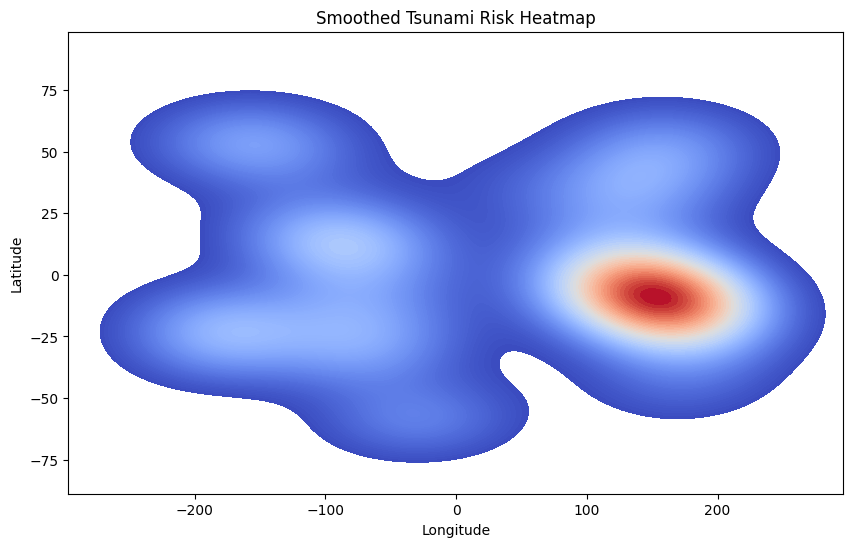

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) #figure 10 x 6
#วาด heatmap แบบ smoothed KDE ซึ่งจะวาดพื้นที่สีเข้ม = ความเสี่ยงสูง
sns.kdeplot(
    data=df,
    x='longitude',
    y='latitude',
    weights=df['tsunami_risk'],
    cmap='coolwarm',
    fill=True,
    thresh=0.05, # threshold 0.05
    levels=100    #ระดับสี 100 ระดับ
)
plt.title("Smoothed Tsunami Risk Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
!pip install cartopy #การสร้างภาพหรือแผนที่จากข้อมูลที่มีตำแหน่งบนโลก

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.7 MB/s eta 0:00:00


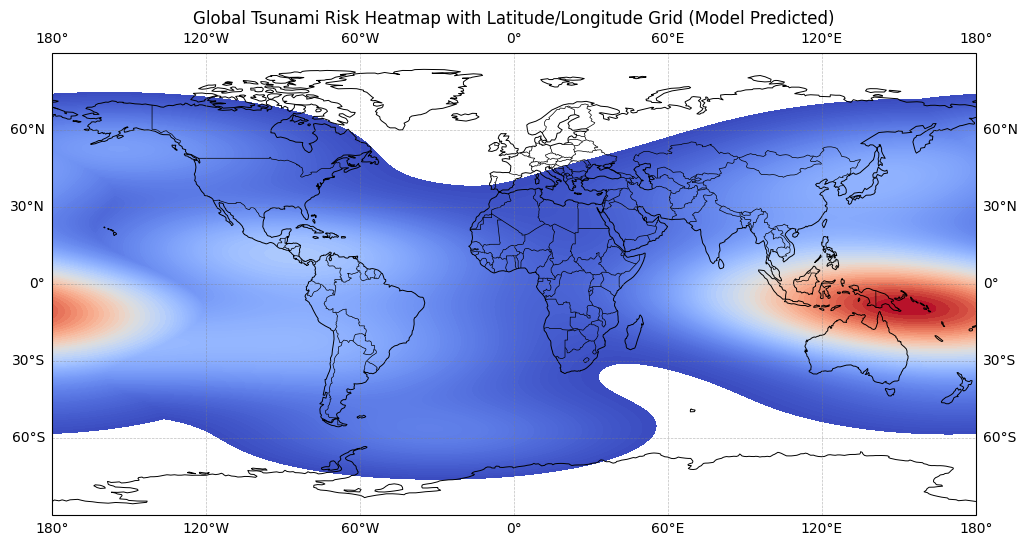

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))  #figure 12 x 6
ax = plt.axes(projection=ccrs.PlateCarree()) # axes ใช้ Plate Carree projection กำหนด (ลองจิจูด/ละติจูดตรง)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7) #เส้นชายฝั่งบนแผนที่
ax.add_feature(cfeature.BORDERS, linewidth=0.5) #เส้นพรมแดนประเทศ
ax.set_global()

sns.kdeplot(
    data=df,
    x='longitude',
    y='latitude',
    weights=df['tsunami_risk'], #weight prob class1
    cmap='coolwarm',
    fill=True,
    thresh=0.05, #threshold 0.05
    levels=100,
    transform=ccrs.PlateCarree()  #  x/y คือ lon/lat projection
)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--') #grid line latitude/longitude
gl.top_labels = True
gl.right_labels = True
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title("Global Tsunami Risk Heatmap with Latitude/Longitude Grid (Model Predicted)", fontsize=12)
plt.show()

จุดเสี่ยงชัดเจนอยู่บริเวณอินโดนีเซีย–ปาปัวนิวกินี
เพราะเป็นบริเวณ

1.  แนวรอยเลื่อนย่อยของ Pacific Ring of Fire
2.  เกิดแผ่นดินไหวขนาดใหญ่บ่อย


####XGboost

#####defualt

In [ ]:
from  xgboost import XGBClassifier, plot_importance

In [ ]:
xgb1 = XGBClassifier(random_state=7)
xgb1.fit(X_trainQ1,Y_trainQ1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb1_y_pred_train =  xgb1.predict(X_trainQ1)
xgb1_y_predprob_train =  xgb1.predict_proba(X_trainQ1)

xgb1_y_pred_test =  xgb1.predict(X_testQ1)
xgb1_y_predprob_test =  xgb1.predict_proba(X_testQ1)
print('Test set record')
print('Class prediction : {}'.format(xgb1_y_pred_test[1]))
print('Probability prediction : {}'.format(xgb1_y_predprob_test[1])) #แสดงผลการทำนาย predict test ตัวที่ 2 (pythom เริ่มจาก 0)

Test set record
Class prediction : 1
Probability prediction : [0.00142407 0.9985759 ]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_testQ1, xgb1_y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        96
           1       0.88      0.85      0.87        61

    accuracy                           0.90       157
   macro avg       0.89      0.89      0.89       157
weighted avg       0.90      0.90      0.90       157



#####optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):
# หมายเหตุ: การรัน Optuna แต่ละครั้งจะได้ผลต่างกัน
# เพราะ Optuna, การแบ่ง KFold และ XGBoost มีการสุ่มในตัว
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True), # 0.01-0.3 ป้องกัน overfitting
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5), #ให้ Optuna หา value ที่ balance ระหว่าง learning & overfitting
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), #ขั้นต่ำใน leaf node
        'random_state': 7,
        'n_jobs': -1, #ใช้ทุก CPU cores
        'scale_pos_weight': 1, #dataset ค่อนข้าง balanced
        'use_label_encoder': False, #ปิด warning จะได้ไม่มี warning ปนกับ output
        'eval_metric': 'logloss', # logloss เป็น metric ใน training
         #regularization ป้องกัน overfitting
        'reg_lambda': 1.0,
        'reg_alpha': 0.0
        }


    model = XGBClassifier(**params)

    #recall สูงสุด
    score = cross_val_score(model, X_trainQ1, Y_trainQ1, cv=5, scoring='recall')
    return score.mean()

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize') #maximize recall
study.optimize(objective, n_trials=50, n_jobs=-1) #ทำ optimization 50 รอบ ใช้ CPU ทุก core

best_params11 = study.best_params
print("Best Recall (cross-validation):", round(study.best_value, 4)) #แสดง recall สูงสุดที่ได้
print("Best Parameters:")
for k, v in best_params11.items():
    print(f"   {k}: {v}")

[I 2025-11-17 14:14:51,135] A new study created in memory with name: no-name-0101b453-f01e-4923-889d-3331946b47fe
[I 2025-11-17 14:14:52,006] Trial 1 finished with value: 0.8354591836734695 and parameters: {'n_estimators': 231, 'max_depth': 7, 'learning_rate': 0.025767401783334233, 'subsample': 0.6880662761623579, 'colsample_bytree': 0.8482835361723893, 'gamma': 4.259762499491739, 'min_child_weight': 10}. Best is trial 1 with value: 0.8354591836734695.
[I 2025-11-17 14:14:52,319] Trial 0 finished with value: 0.8396258503401361 and parameters: {'n_estimators': 354, 'max_depth': 6, 'learning_rate': 0.05670040199068381, 'subsample': 0.6437259783777545, 'colsample_bytree': 0.8409314038901754, 'gamma': 2.4797757463948455, 'min_child_weight': 9}. Best is trial 0 with value: 0.8396258503401361.
[I 2025-11-17 14:14:53,128] Trial 2 finished with value: 0.8682823129251702 and parameters: {'n_estimators': 339, 'max_depth': 15, 'learning_rate': 0.040789759458774166, 'subsample': 0.7031077503009169

Best Recall (cross-validation): 0.8849
Best Parameters:
   n_estimators: 196
   max_depth: 4
   learning_rate: 0.03848222394529811
   subsample: 0.8643463295663594
   colsample_bytree: 0.8623460024868488
   gamma: 1.9507984307792763
   min_child_weight: 1


In [ ]:
xgb1_best = XGBClassifier(**best_params11,random_state=7,scale_pos_weight= 1)
xgb1_best.fit(X_trainQ1, Y_trainQ1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8623460024868488, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.9507984307792763, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03848222394529811,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=196, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
xgb1_best_y_pred_train =  xgb1_best.predict(X_trainQ1)
xgb1_best_y_predprob_train =  xgb1_best.predict_proba(X_trainQ1)

xgb1_best_y_pred_test =  xgb1_best.predict(X_testQ1)
xgb1_best_y_predprob_test =  xgb1_best.predict_proba(X_testQ1)

print('Test set record')
print('Class prediction : {}'.format(xgb1_best_y_pred_test[1])) # prdict ตัวที่2
print('Probability prediction : {}'.format(xgb1_best_y_predprob_test[1]))

Test set record
Class prediction : 1
Probability prediction : [0.07367557 0.9263244 ]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_testQ1, xgb1_best_y_pred_test)) #performance model บน test set
#เลือกโมเดลนี้เพราะว่า recall เยอะกว่าเพื่อที่จะให้จับสึนามิมากกว่า


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        96
           1       0.90      0.90      0.90        61

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



In [ ]:
importances = list(xgb1_best.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(featurename, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) # ordering
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dmin                 Importance: 0.38499999046325684
Variable: nst                  Importance: 0.24300000071525574
Variable: longitude            Importance: 0.07900000363588333
Variable: magnitude            Importance: 0.04699999839067459
Variable: latitude             Importance: 0.04699999839067459
Variable: mmi                  Importance: 0.04399999976158142
Variable: depth                Importance: 0.041999999433755875
Variable: gap                  Importance: 0.039000000804662704
Variable: sig                  Importance: 0.03799999877810478
Variable: cdi                  Importance: 0.035999998450279236


In [ ]:
#Visualization ดู pattern ตรงไหนเสี่ยงสูง
df['tsunami_risk'] = xgb1_best.predict_proba(X_Q1)[:, 1]

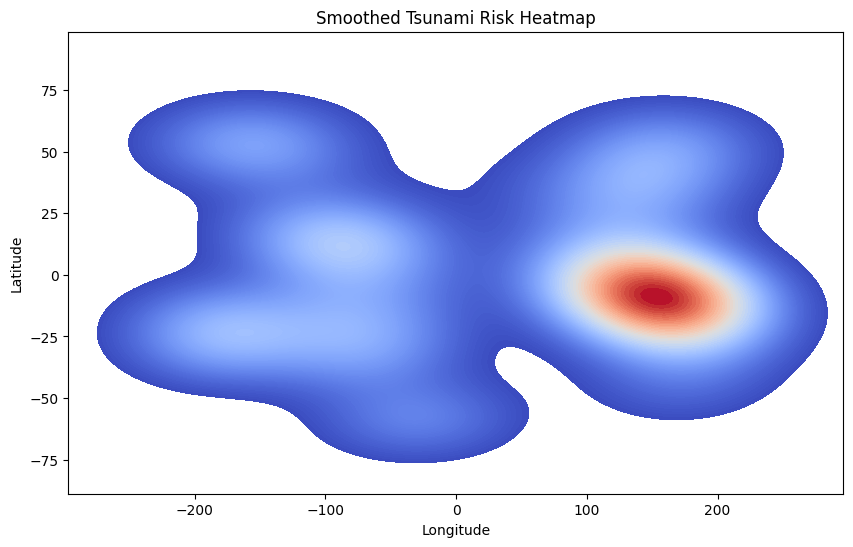

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6)) #figure 10 x 6
sns.kdeplot(
    data=df,
    x='longitude',
    y='latitude',
    weights=df['tsunami_risk'],
    cmap='coolwarm',
    fill=True,
    thresh=0.05,
    levels=100
)
plt.title("Smoothed Tsunami Risk Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

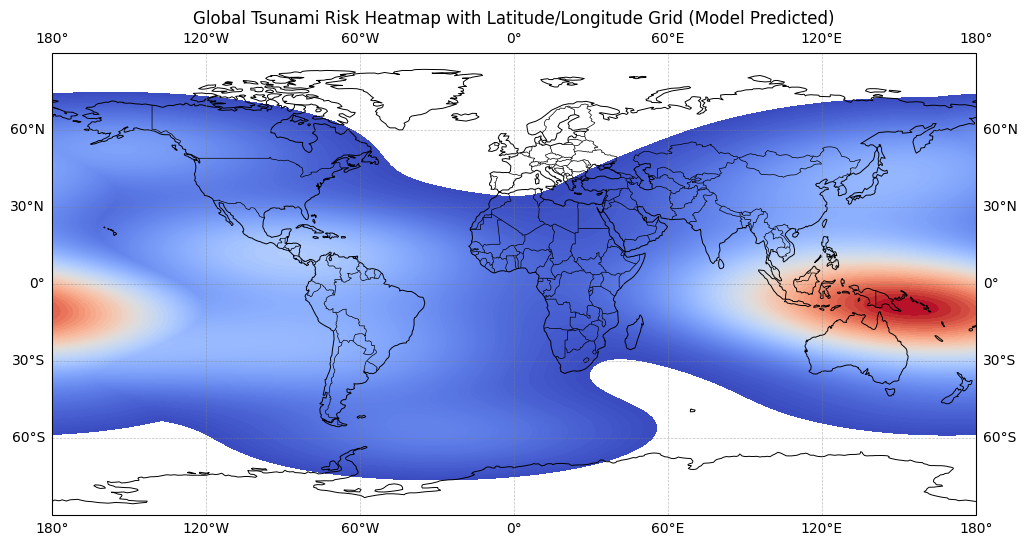

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6)) #figure 12x6
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

sns.kdeplot(
    data=df,
    x='longitude',
    y='latitude',
    weights=df['tsunami_risk'],
    cmap='coolwarm',
    fill=True,
    thresh=0.05,
    levels=100,
    transform=ccrs.PlateCarree()
)

gl = ax.gridlines(draw_labels=True,
                  linewidth=0.5,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')
gl.top_labels = True
gl.right_labels = True

gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title("Global Tsunami Risk Heatmap with Latitude/Longitude Grid (Model Predicted)", fontsize=12)
plt.show()

#### Evaluation

In [ ]:
# Q1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

rf1_eval_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(Y_testQ1, rf1_best_y_pred_test),
    "Precision": precision_score(Y_testQ1, rf1_best_y_pred_test),
    "Recall": recall_score(Y_testQ1, rf1_best_y_pred_test),
    "F1": f1_score(Y_testQ1, rf1_best_y_pred_test)
}

xgb1_eval_metrics = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(Y_testQ1, xgb1_best_y_pred_test),
    "Precision": precision_score(Y_testQ1, xgb1_best_y_pred_test),
    "Recall": recall_score(Y_testQ1, xgb1_best_y_pred_test),
    "F1": f1_score(Y_testQ1, xgb1_best_y_pred_test)
}

df_compare_Q1 = pd.DataFrame([rf1_eval_metrics, xgb1_eval_metrics])
display(df_compare_Q1.round(4))

,Model,Accuracy,Precision,Recall,F1
0,Random Forest,0.9045,0.8833,0.8689,0.8760
1,XGBoost,0.9236,0.9016,0.9016,0.9016


Focus on recall, วัดว่าโมเดลจะตรวจจับสึนามิจริงได้กี่% เพราะไม่อยากให้เกิด False Negative เช่น กรณีที่โมเดลทำนายว่าไม่เกิดสึนามิแต่จริงๆแล้วเกิดจึงไม่ได้เเจ้งเตือน อาจทำให้เกิดอันตรายถึงแก่ชีวิตได้
ดังนั้นจึงเลือกโมเดลที่ recall สูงกว่า นั่นก็คือ XGboost

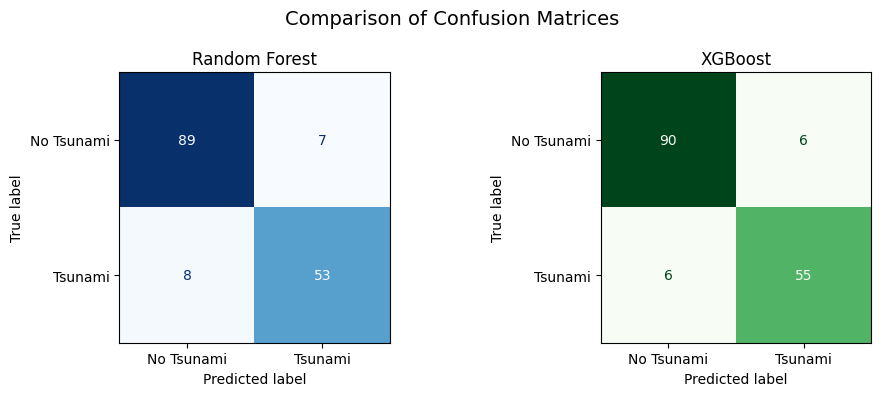

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === สร้าง Confusion Matrix ของแต่ละโมเดล ===
cm_rf = confusion_matrix(Y_testQ1, rf1_best_y_pred_test)
cm_xgb = confusion_matrix(Y_testQ1, xgb1_best_y_pred_test)

# === สร้าง subplot สำหรับแสดง 2 รูปข้างกัน ===
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# === Random Forest ===
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Tsunami', 'Tsunami'])
disp_rf.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Random Forest', fontsize=12)

# === XGBoost ===
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Tsunami', 'Tsunami'])
disp_xgb.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('XGBoost', fontsize=12)

# === ปรับ layout ให้สวย ===
plt.suptitle('Comparison of Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()


False nagative ของโมเดล XGboost น้อยกว่าของ Random Forest

Random Forest AUC-ROC: 0.9597
XGBoost AUC-ROC:       0.9698


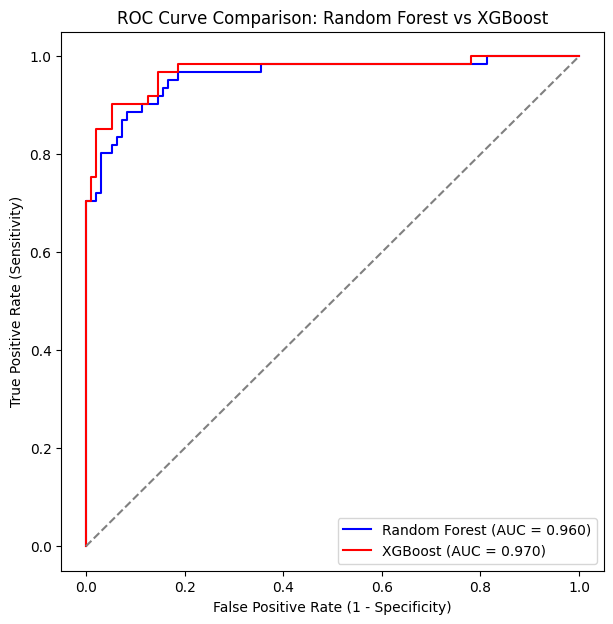

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# --- Random Forest ---
rf_y_true = Y_testQ1
rf_y_prob = rf1_best_y_predprob_test[:, 1]
rf_auc = roc_auc_score(rf_y_true, rf_y_prob)

# --- XGBoost ---
xgb_y_true = Y_testQ1
xgb_y_prob = xgb1_best_y_predprob_test[:, 1]
xgb_auc = roc_auc_score(xgb_y_true, xgb_y_prob)

# --- แสดงค่า AUC ---
print(f"Random Forest AUC-ROC: {rf_auc:.4f}")
print(f"XGBoost AUC-ROC:       {xgb_auc:.4f}")

# --- วาด ROC Curve เปรียบเทียบ ---
rf_fpr, rf_tpr, _ = roc_curve(rf_y_true, rf_y_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(xgb_y_true, xgb_y_prob)

plt.figure(figsize=(7,7))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(xgb_fpr, xgb_tpr, color='red', label=f'XGBoost (AUC = {xgb_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve Comparison: Random Forest vs XGBoost')
plt.legend(loc='lower right')
plt.show()

จะเห็นได้ว่า โมเดล XGBoost มี ROC curve และ AUC ที่ดีกว่า และยังมีค่า recall ที่ดีกว่า ดังนั้นเราจึงเลือกใช้ โมเดล XGBoost สำหรับ Question 1

##Question 2

Q2: จากข้อมูลเชิงธรณี (depth, latitude, longitude, sig, mmi, cdi, nst, dmin, gap) เราสามารถ ทำนายค่าขนาดแผ่นดินไหว (magnitude) แบบต่อเนื่อง ได้แม่นยำเพียงใด?

###Random forest

####defualt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf2 = RandomForestRegressor()
rf2.fit(X_trainQ2, Y_trainQ2)

RandomForestRegressor()

In [ ]:
rf2_y_pred_train = rf2.predict(X_trainQ2)
rf2_y_predprob_train = rf2.predict(X_trainQ2)

rf2_y_pred_test =  rf2.predict(X_testQ2)
rf2_y_predprob_test =  rf2.predict(X_testQ2)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = rf2.predict(X_testQ2)
y_true = Y_testQ2
r2 = r2_score(y_true, y_pred) # R²
rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # RMSE
mae = mean_absolute_error(y_true, y_pred) #MAE

print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")


R² (Coefficient of Determination): 0.6971
RMSE (Root Mean Squared Error): 0.2045
MAE (Mean Absolute Error): 0.1129


####optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = None #ตั้งให้ต้นไม้ไม่ prune
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt'])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=7,
        n_jobs=-1 )

    score = cross_val_score(model, X_trainQ2, Y_trainQ2, cv=5, scoring='r2')
    #ใช้ cross-validation (cv=5)
    return score.mean()
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize') # maximize R²
study.optimize(objective, n_trials=50, n_jobs=-1)

best_params2 = study.best_params
print(" Best R² (cross-validation):", round(study.best_value, 4)) #แสดงค่า R²จาก cross-validation
print(" Best Parameters:")
for k, v in best_params2.items():
    print(f"   {k}: {v}")                   #พิมพ์ค่าพารามิเตอร์ที่ดีที่สุดแต่ละตัวออกมาให้ดู


[I 2025-11-17 02:56:02,088] A new study created in memory with name: no-name-c6ed6663-0f26-47e2-8894-f4b4f7657b3c
[I 2025-11-17 02:56:09,747] Trial 0 finished with value: 0.6621728775457297 and parameters: {'n_estimators': 241, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6621728775457297.
[I 2025-11-17 02:56:12,429] Trial 1 finished with value: 0.6461578599763916 and parameters: {'n_estimators': 380, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6621728775457297.
[I 2025-11-17 02:56:18,942] Trial 2 finished with value: 0.6175562224622 and parameters: {'n_estimators': 342, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6621728775457297.
[I 2025-11-17 02:56:23,471] Trial 3 finished with value: 0.6163816640543751 and parameters: {'n_estimators': 436, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. 

 Best R² (cross-validation): 0.6687
 Best Parameters:
   n_estimators: 351
   min_samples_split: 2
   min_samples_leaf: 1
   max_features: sqrt


In [ ]:
rf2_best = RandomForestRegressor(**best_params2, random_state=7)
rf2_best.fit(X_trainQ2, Y_trainQ2)


RandomForestRegressor(max_features='sqrt', n_estimators=351, random_state=7)

In [ ]:

rf2_best_y_pred_train = rf2_best.predict(X_trainQ2)
rf2_best_y_predprob_train = rf2_best.predict

rf2_best_y_pred_test =  rf2_best.predict(X_testQ2)
rf2_best_y_predprob_test =  rf2_best.predict(X_testQ2)


In [ ]:
#โมเดลนี้ดีกว่าเพราะ R² สูงกว่า
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = rf2_best.predict(X_testQ2)
y_true = Y_testQ2

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")


R² (Coefficient of Determination): 0.7372
RMSE (Root Mean Squared Error): 0.1905
MAE (Mean Absolute Error): 0.1187


###XGboost

####default

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb2 = XGBRegressor()
xgb2.fit(X_trainQ2, Y_trainQ2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#training
xgb2_y_pred_train =  xgb2.predict(X_trainQ2)
xgb2_y_predprob_train =  xgb2.predict(X_trainQ2)

#test
xgb2_y_pred_test =  xgb2.predict(X_testQ2)
xgb2_y_predprob_test =  xgb2.predict(X_testQ2)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = xgb2.predict(X_testQ2)
y_true = Y_testQ2

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")


R² (Coefficient of Determination): 0.7149
RMSE (Root Mean Squared Error): 0.1984
MAE (Mean Absolute Error): 0.1086


####optuna

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 7,
        'n_jobs': -1,
        'tree_method': 'hist',   # เร็วและเสถียรบน CPU
        'eval_metric': 'rmse' ,
        # default regularization
        'reg_lambda': 1.0,
        'reg_alpha': 0.0 }

    model = XGBRegressor(**params)
    # ใช้ R² เป็นคะแนนในการ optimize
    score = cross_val_score(model, X_trainQ2, Y_trainQ2, cv=5, scoring='r2')
    return score.mean()
    #ประเมินโมเดลด้วย cross-validation (แบ่ง 5 ส่วน) โดยใช้ R² เป็นเกณฑ์

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)
#ใช้ TPE เพื่อหาชุดพารามิเตอร์ที่ทำให้ค่า R² สูงที่สุด จากการทดลอง 50 ครั้ง

best_params3 = study.best_params
print(" Best R² (cross-validation):", round(study.best_value, 4))
print(" Best Parameters:")
for k, v in best_params3.items():
    print(f"   {k}: {v}")


[I 2025-11-17 02:59:40,994] A new study created in memory with name: no-name-f782e041-9f90-4c65-9757-73b3c923054b
[I 2025-11-17 02:59:41,427] Trial 1 finished with value: 0.5899129617832509 and parameters: {'n_estimators': 102, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 1.3834040669546677, 'learning_rate': 0.06983847510634097, 'subsample': 0.6198075411519592, 'colsample_bytree': 0.6428376619510412}. Best is trial 1 with value: 0.5899129617832509.
[I 2025-11-17 02:59:41,791] Trial 0 finished with value: 0.4520688791600186 and parameters: {'n_estimators': 255, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 3.8369641085430213, 'learning_rate': 0.016582949458988572, 'subsample': 0.614485603768537, 'colsample_bytree': 0.5518854098002088}. Best is trial 1 with value: 0.5899129617832509.
[I 2025-11-17 02:59:42,265] Trial 3 finished with value: 0.5383022682211174 and parameters: {'n_estimators': 103, 'max_depth': 5, 'min_child_weight': 10, 'gamma': 2.0304440009804874, 'learning_rate': 0

 Best R² (cross-validation): 0.7189
 Best Parameters:
   n_estimators: 257
   max_depth: 11
   min_child_weight: 6
   gamma: 0.03987533582999091
   learning_rate: 0.15874331178734244
   subsample: 0.88171577748805
   colsample_bytree: 0.9978827837045398


In [ ]:

xgb2_best = XGBRegressor(**best_params3, random_state=7)
xgb2_best.fit(X_trainQ2, Y_trainQ2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9978827837045398, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.03987533582999091, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15874331178734244,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=257, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# train set
xgb2_best_y_pred_train =  xgb2_best.predict(X_trainQ2)
xgb2_best_y_predprob_train =  xgb2_best.predict(X_trainQ2)

# test set
xgb2_best_y_pred_test =  xgb2_best.predict(X_testQ2)
xgb2_best_y_predprob_test =  xgb2_best.predict(X_testQ2)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = xgb2_best.predict(X_testQ2)
y_true = Y_testQ2

r2 = r2_score(y_true, y_pred) #R²
rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # RMSE
mae = mean_absolute_error(y_true, y_pred) # MAE

print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")


R² (Coefficient of Determination): 0.7359
RMSE (Root Mean Squared Error): 0.1909
MAE (Mean Absolute Error): 0.1147


### Evaluation

In [ ]:
# Q2

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf2_best.predict(X_testQ2)
y_true = Y_testQ2

rf_reg_metrics = {
    "Model": "Random Forest Regressor",
    "MAE": mean_absolute_error(y_true, y_pred),
    "MSE": mean_squared_error(y_true, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
    "R2": r2_score(y_true, y_pred)
}

y_pred = xgb2_best.predict(X_testQ2)
y_true = Y_testQ2

xgb_reg_metrics = {
    "Model": "XGBoost Regressor",
    "MAE": mean_absolute_error(y_true, y_pred),
    "MSE": mean_squared_error(y_true, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
    "R2": r2_score(y_true, y_pred)
}

df_compare_Q2 = pd.DataFrame([rf_reg_metrics, xgb_reg_metrics])
display(df_compare_Q2.round(4))


,Model,MAE,MSE,RMSE,R2
0,Random Forest Regressor,0.1187,0.0363,0.1905,0.7372
1,XGBoost Regressor,0.1147,0.0365,0.1909,0.7359


เนื่องจากเป็น regression model จึงใช้ค่าเหล่านี้ในการวัดความแม่นยำและคุณภาพในการทำนาย


MAE → XGBoost มี error เฉลี่ยน้อยกว่าเล็กน้อย

MSE	→	XGBoost มีค่าคลาดเคลื่อนกำลังสองเฉลี่ยต่ำกว่าเล็กน้อย

RMSE	→	XGBoost ทำนายค่าขนาดแผ่นดินไหวได้แม่นกว่าเล็กน้อย

R²	→	XGBoost อธิบายความแปรปรวนในข้อมูลได้มากกว่า

* ทั้งสองโมเดลให้ผลลัพธ์ที่ใกล้เคียงกัน
* XGBoost มีค่าความคลาดเคลื่อนต่ำกว่าเล็กน้อย (MAE,MSE,RMSE) และมีค่า R2 สูงกว่าเล็กน้อย

ซึ่งหมายถึง XGBoost สามารถอธิบายความแปรปรวนของขนาดแผ่นดินไหวได้ดีกว่าเล็กน้อย และทำนายค่าได้ใกล้เคียงจริงมากกว่า จึงเหมาะสมกว่า สำหรับการทำนายค่าขนาดแผ่นดินไหวแบบต่อเนื่องจากข้อมูลเชิงธรณีชุดนี้

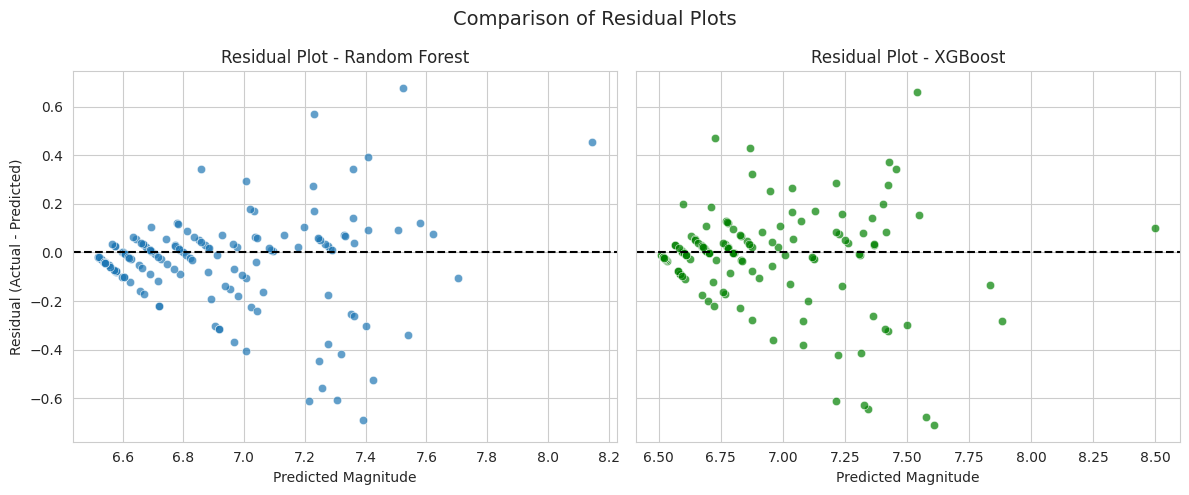

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_true = Y_testQ2
y_pred_rf = rf2_best.predict(X_testQ2)
y_pred_xgb = xgb2_best.predict(X_testQ2)

residuals_rf = y_true - y_pred_rf
residuals_xgb = y_true - y_pred_xgb

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Random Forest
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.7, ax=axes[0])
axes[0].axhline(y=0, color='black', linestyle='--')
axes[0].set_title('Residual Plot - Random Forest', fontsize=12)
axes[0].set_xlabel('Predicted Magnitude')
axes[0].set_ylabel('Residual (Actual - Predicted)')

# XGBoost
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.7, color='green', ax=axes[1])
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_title('Residual Plot - XGBoost', fontsize=12)
axes[1].set_xlabel('Predicted Magnitude')

plt.suptitle('Comparison of Residual Plots', fontsize=14)
plt.tight_layout()
plt.show()


Residual plot ถูกใช้เพื่อตรวจสอบรูปแบบความผิดพลาดของโมเดล

* ไม่มี pattern ชัดเจนว่าเป็นโค้ง หรือเฉียง
→ แสดงว่า โมเดลทั้งสองเรียนรู้ความสัมพันธ์ได้ค่อนข้างดี และ ไม่มี systematic bias ชัดเจน
* Residual ของทั้งสองโมเดลกระจายตัวมากขึ้นเมื่อ magnitude สูงขึ้น
→ บ่งบอกว่าโมเดลมีแนวโน้มทำนายแผ่นดินไหวขนาดใหญ่ได้ยากกว่า

* XGBoost มี residual ที่กระจายตัวเป็นช่วงกว้างมากกว่า แต่กระจายตัวค่อนข้างสมมาตรรอบเส้นศูนย์ → แม้จะผิดพลาดมากขึ้นใน magnitude สูง แต่มี bias น้อยกว่า และสมดุลกว่า Random Forest

XGBoost ให้ residual ที่กระจายใกล้ศูนย์มากกว่า Random Forest และมีความเป็นระบบน้อยกว่า ซึ่งหมายถึงว่า XGBoost มีแนวโน้มพยากรณ์ได้สม่ำเสมอกว่า โดยเฉพาะในช่วง magnitude สูง

# Conclusion

Q1 -- ทำนายได้หรือไม่ว่าแผ่นดินไหวเหตุการณ์หนึ่งจะก่อให้เกิดสึนามิหรือไม่ โดยใช้ข้อมูลทางธรณี?
*   สามารถทำนายได้โดยใช้ XGBoost model ที่มีค่า recall สูง

-- ปัจจัยใดที่มีผลต่อความแม่นยำในการทำนายการเกิดสึนามิ?
1.   dmin(ระยะทางถึงสถานีตรวจวัดที่ใกล้ที่สุด) -> 0.3845
2.   nst(จำนวนสถานีตรวจวัดแผ่นดินไหวที่บันทึกข้อมูล) ->  0.243
3.   longitude -> 0.079
4.   magnitude -> 0.047

Q2 -- ทำนายค่าขนาดแผ่นดินไหว (magnitude) แบบต่อเนื่อง ได้แม่นยำเพียงใด?

* โมเดล XGBoot สามารถอธิบายความแปรปรวนได้ประมาณ 74% และค่าคลาดเคลื่อนเฉลี่ยประมาณ 0.19 magnitude
* ถือว่าแม่นยำพอสมควรในเชิงภูมิศาสตร์และธรณีวิทยา แต่ความแม่นยำยังจำกัด โดยเฉพาะในกรณีที่เกิดแผ่นดินไหวขนาดใหญ่ ทำให้ผลลัพธ์เหมาะสำหรับการประเมินเบื้องต้นมากกว่าการทำนายแบบ real-time ที่ต้องการความแม่นยำสูง
